In [23]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("youtube_data.db")
df = pd.read_csv("Data/0.txt", sep="\t", header=None)

# compress the 10th column onward into one column without NaN values
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]
df.to_sql('my_table', conn, if_exists='replace', index=False)
cursor =conn.cursor()

cursor.execute('SELECT * FROM my_table WHERE my_table.age == 653')
result = cursor.fetchall()
print(result) 
# hello
conn.close()
df.head(100)

[('LKh7zAJ4nwo', 'TheReceptionist', 653, 'Entertainment', 424, 13021, 4.34, 1305, 744, 'DjdA-5oKYFQ,NxTDlnOuybo,c-8VuICzXtU,DH56yrIO5nI,W1Uo5DQTtzc,E-3zXq_r4w0,1TCeoRPg5dE,yAr26YhuYNY,2ZgXx72XmoE,-7ClGo-YgZ0,vmdPOOd6cxI,KRHfMQqSHpk,pIMpORZthYw,1tUDzOp10pk,heqocRij5P0,_XIuvoH6rUg,LGVU5DsezE0,uO2kj6_D8B4,xiDqywcDQRM,uX81lMev6_o')]


/Users/prestonstuff/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


,video ID,uploader,age,category,length,views,rate,ratings,comments,Related IDs
0,LKh7zAJ4nwo,TheReceptionist,653,Entertainment,424,13021,4.34,1305,744,"DjdA-5oKYFQ,NxTDlnOuybo,c-8VuICzXtU,DH56yrIO5n..."
1,7D0Mf4Kn4Xk,periurban,583,Music,201,6508,4.19,687,312,"e2k0h6tPvGc,yuO6yjlvXe8,VqpnWBo-R4E,bdDskrr8jR..."
2,n1cEq1C8oqQ,Pipistrello,525,Comedy,125,1687,4.01,363,141,"eprHhmurMHg,i30NkTJOrak,2XtLgZol5wI,3nH5Tccz8E..."
3,OHkEzL4Unck,ichannel,638,Comedy,299,8043,4.40,518,371,"eyUSTmEUQRg,FDIH1GNQXQE,Wtj31off8-I,mDjwzhc8dQ..."
4,-boOvAGNKUc,mrpitifulband,639,Music,287,7548,4.48,606,386,"fmUwUURgsX0,bR27ACWomug,LlH7WcVptw8,saBmFpuwmK..."
...,...,...,...,...,...,...,...,...,...,...
95,MNxwAU_xAMk,j0sealan,538,Comedy,140,7066676,4.56,14786,7302,"MNxwAU_xAMk,JlfXGGkUcJQ,jwWv2IHywDQ,iqLRRDrHrJ..."
96,RUCZJVJ_M8o,markleung,337,Entertainment,11,6952767,4.21,13932,2558,"RUCZJVJ_M8o,2dE-W9dotQ4,uFoWXi25RBk,0fIeT7zKxR..."
97,HSEnYYpE_V8,boh3m3,736,News & Politics,571,6677,4.72,522,325,"HNcsMlhQdIs,vuUiYEKptAU,bGasrI7m7so,as3DH05Mbk..."
98,FM1KUDE3C3k,renetto,736,News & Politics,1063,9062,4.57,525,488,"LnMvSxl0o0A,IKMtzNuKQso,Bq8ubu7WHkY,Su0VTfwia1..."


{'LKh7zAJ4nwo': ['DjdA-5oKYFQ', 'NxTDlnOuybo', 'c-8VuICzXtU', 'DH56yrIO5nI', 'W1Uo5DQTtzc', 'E-3zXq_r4w0', '1TCeoRPg5dE', 'yAr26YhuYNY', '2ZgXx72XmoE', '-7ClGo-YgZ0', 'vmdPOOd6cxI', 'KRHfMQqSHpk', 'pIMpORZthYw', '1tUDzOp10pk', 'heqocRij5P0', '_XIuvoH6rUg', 'LGVU5DsezE0', 'uO2kj6_D8B4', 'xiDqywcDQRM', 'uX81lMev6_o'], '7D0Mf4Kn4Xk': ['e2k0h6tPvGc', 'yuO6yjlvXe8', 'VqpnWBo-R4E', 'bdDskrr8jRY', 'y3IDp2n7B48', 'JngPWhfCb2M', 'KQaUvH5oiO4', 'NSzrwv5MCwc', 'NHB0a0xtLgU', 'DlRodd4s86s', 'EzKwOYLh-S0', 'eUIfRyrqwp8', 'AK8Wtfwe-1k', 'Eq4hGkIqBGw', 'N1lkLaLJHlc', '-uIffs-DHkM', 'zpTorUhCd8Y', 'AvSK0qPw7EU', 'WX5KLMqY4bM', 'VKFqqoeMdjw'], 'n1cEq1C8oqQ': ['eprHhmurMHg', 'i30NkTJOrak', '2XtLgZol5wI', '3nH5Tccz8EQ', 'bSPVayE0NhE', 'sEqCkwPmQ_w', 'hut3VRL5XRE', 'bWlPSLUT-6U', 'dsBTo5LExr0', '7PSvpPXppXA', 'yLup8wjbSIo', 'lbf4d1pZI9c', 'uRQYan_-CTQ', 'gnpvEvuiFoQ', 'F2_5KOnSsfI', 'DINu35v3eMU', '9uSiyn7t_0o', 'YfShxdbAJS8', 'ssdfqTwZXY0', 'z5wDjq8o60c'], 'OHkEzL4Unck': ['eyUSTmEUQRg', 'FDIH1GNQXQE', 'W

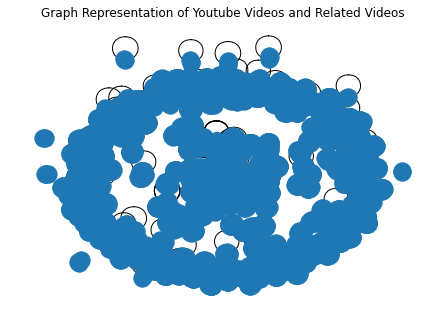

In [24]:
# Read youtube data
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv("Data/0.txt", sep="\t", header=None)
#9th column onwards are related videos
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# convert make adjacency list of video ids and related video ids using maps
adj_list = df.iloc[:, [0, 9]].set_index(0).to_dict()[9]
# separate related video ids into a list
adj_list = {k: v.split(",") for k, v in adj_list.items()}
print(adj_list)
# make graph
G = nx.from_dict_of_lists(adj_list)
# Randomly delete most of the nodes to make the graph look nicer
import random
nx.draw(G)
plt.title("Graph Representation of Youtube Videos and Related Videos")
print(G)
nx.draw(G)
plt.title("Graph Representation of Youtube Videos and Related Videos")
plt.show()
# Look at video with id LKh7zAJ4nwo
#print(G["LKh7zAJ4nwo"]) # returns dict of related videos


In [25]:

# Find which video has the most related videos
max_degree = 0
max_video = ""
for video in G.nodes():
    if G.degree(video) > max_degree:
        max_degree = G.degree(video)
        max_video = video
print("Video with the most related videos: ", max_video, "with", max_degree, "related videos")


Video with the most related videos:  V6k3YlcYtS0 with 24 related videos


In [26]:

# Implement pagerank
pagerank = nx.pagerank(G)
print(pagerank)
# Find which video has the highest pagerank
max_pagerank = 0
max_video = ""
for video in pagerank:
    if pagerank[video] > max_pagerank:
        max_pagerank = pagerank[video]
        max_video = video
print("Video with the highest pagerank: ", max_video, "with", max_pagerank, "pagerank")

{'LKh7zAJ4nwo': 0.0029029725520111657, '7D0Mf4Kn4Xk': 0.0029029725520111657, 'n1cEq1C8oqQ': 0.0029029725520111657, 'OHkEzL4Unck': 0.0029029725520111657, '-boOvAGNKUc': 0.0029029725520111657, 'hFFH8DaOHQg': 0.0028256492414296857, 'LzHjIj3fpR8': 0.0029029725520111657, 'SDNkMu8ZT68': 0.00029770765108663293, 'PkGUU_ggO3k': 0.0028256492414296857, 'RX24KLBhwMI': 0.0029029725520111657, 'MEvoy_owET8': 0.0028289837244387123, 'w6Pbyg_kcEk': 0.0029029725520111657, 'Qehxjub5lyo': 0.0029029725520111657, 'sRnLdmvQBsI': 0.0028115597484699544, 'xGn0q1zoibw': 0.0028115597484699544, 'zRVts7TFw-Y': 0.0029029725520111657, '_5QUdvUhCZc': 0.0029029725520111657, 'D6U6GxnvlE8': 0.0029029725520111657, 'OUi9-jqq_i0': 0.0028180068035210293, 'bqZauhidT1w': 0.0029029725520111657, 'fQShwYqGqsw': 0.0007797108208620243, 'mWzdp7Cg41w': 0.0029029725520111657, '-keC9GymLpI': 0.0028957135250139068, 'H-ucblRMjuY': 0.0029029725520111657, 'jDRENHHatx4': 0.0029029725520111657, 'ztIH6tc6Aa4': 0.002321913401263354, 'l69Vi5IDc0

In [27]:
# top-k most influential videos
# Check the properties of these videos (# of views, # edges, category…). What can we find out? Present your findings.
import heapq
k = 10
top_k = heapq.nlargest(k, pagerank, key=pagerank.get)
print(top_k)
avg_views = 0
avg_edges = 0
categories = {}
for video in top_k:
    avg_views += df[df[0] == video][5].values[0]
    avg_edges += G.degree(video)
    category = df[df[0] == video][3].values[0]
    if category in categories:
        categories[category] += 1
    else:
        categories[category] = 1

print("Average views of top", k, "videos:", avg_views/k)
print("Average edges of top", k, "videos:", avg_edges/k)
print("Categories of top", k, "videos:", categories)

['wTNlWRbRtS0', 'O9mEKMz2Pvo', 'P1OXAQHv09E', 'c6SHsF1n9Qw', 'LKh7zAJ4nwo', '7D0Mf4Kn4Xk', 'n1cEq1C8oqQ', 'OHkEzL4Unck', '-boOvAGNKUc', 'LzHjIj3fpR8']
Average views of top 10 videos: 470866.9
Average edges of top 10 videos: 20.5
Categories of top 10 videos: {'Comedy': 5, 'Music': 4, 'Entertainment': 1}


 Pearson Correlation Coefficient: 0.12171943127289389
P-value: 0.0952216702684446
Spearman Rank Correlation Coefficient: -0.13134562394536706
P-value: 0.07161818544899273
Covariance: 409.22744958853673


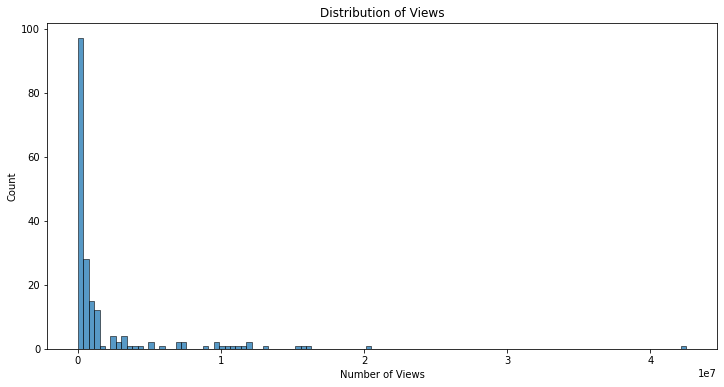

In [47]:

import numpy as np
import scipy.stats
import seaborn as sns

# Relationship between pagerank and views
#correlation analysis 
common_video_ids = set(pagerank.keys()) & set(df[0].values)
pagerank_values = np.array([pagerank[video] for video in common_video_ids])
views_values = np.array([df[df[0] == video][5].values[0] for video in common_video_ids])
# Calculate the correlation coefficient and p-value
corr_coeff, p_value = scipy.stats.pearsonr(pagerank_values, views_values)

#get pearson correlation
print(" Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

# Calculate the correlation coefficient and p-value for spearman
spearman_coefficient, spearman_p_value = scipy.stats.spearmanr(pagerank_values, views_values)
print("Spearman Rank Correlation Coefficient:", spearman_coefficient)
print("P-value:", spearman_p_value)

#show covariance of relationship
cov_matrix = np.cov(pagerank_values, views_values)
covariance = cov_matrix[0, 1]
print("Covariance:", covariance)

#plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[5])
plt.title('Distribution of Views')
plt.xlabel('Number of Views')
plt.show()


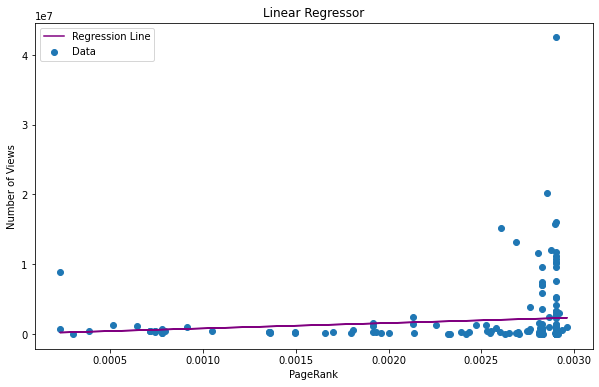

In [46]:
from sklearn.linear_model import LinearRegression

# Reshape for linear regression
pagerank_values_reshaped = pagerank_values.reshape(-1, 1)

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(pagerank_values_reshaped, views_values)

# Get slope and intercept
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Plot scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(pagerank_values, views_values, label='Data')
plt.plot(pagerank_values, regressor.predict(pagerank_values_reshaped), color='purple',  label='Regression Line')
plt.title('Linear Regressor')
plt.xlabel('PageRank')
plt.ylabel('Number of Views')
plt.legend()
plt.show()

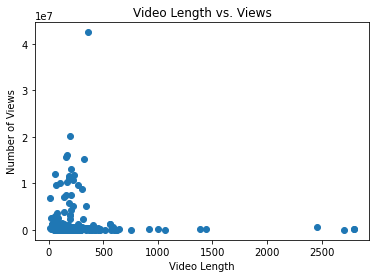

In [44]:
#relationship between video length and views
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df[4], df[5])
plt.title('Video Length vs. Views')
plt.xlabel('Video Length')
plt.ylabel('Number of Views')
plt.show()

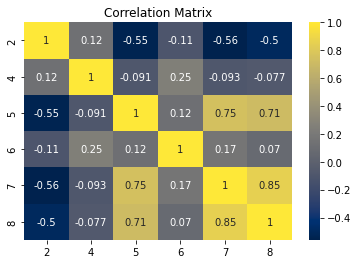

In [45]:
#correlation matrix between each of the features 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#Read Data + Raw 
import pandas as pd
import sqlite3

df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# compress the 10th column onward into one column without NaN values
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]

print(df["Related IDs"]) 
# hello



0      DjdA-5oKYFQ,NxTDlnOuybo,c-8VuICzXtU,DH56yrIO5n...
1      e2k0h6tPvGc,yuO6yjlvXe8,VqpnWBo-R4E,bdDskrr8jR...
2      eprHhmurMHg,i30NkTJOrak,2XtLgZol5wI,3nH5Tccz8E...
3      eyUSTmEUQRg,FDIH1GNQXQE,Wtj31off8-I,mDjwzhc8dQ...
4      fmUwUURgsX0,bR27ACWomug,LlH7WcVptw8,saBmFpuwmK...
                             ...                        
184    7WmMcqp670s,RFtTSisZtVY,JFeSH655mas,6FzTEVnwYe...
185    xd03Xz7U41A,e5eLJIVY2zs,5-uT93fl8aE,OIpslHiXv7...
186    N0TR0Irx4Y0,hX21wbRAkx4,OnN9sX_Plvs,ygakq6lAog...
187    uGiGFQDS7mQ,j1aBQPCZoNE,WsmC6GXMj3I,pjgxSfhgQV...
188    o4x-VW_rCSE,d2FEj5BCmmM,8kOs3J0a2aI,7ump9ir4w-...
Name: Related IDs, Length: 189, dtype: object


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df is your DataFrame
categories = df['category'].tolist()

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the categories
category_counts = vectorizer.fit_transform(categories)

# Summing the counts of each category
sum_words = category_counts.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Get the most common category
most_common_category = words_freq[0][0]

print(f"The most common category is: {most_common_category}")

The most common category is: comedy


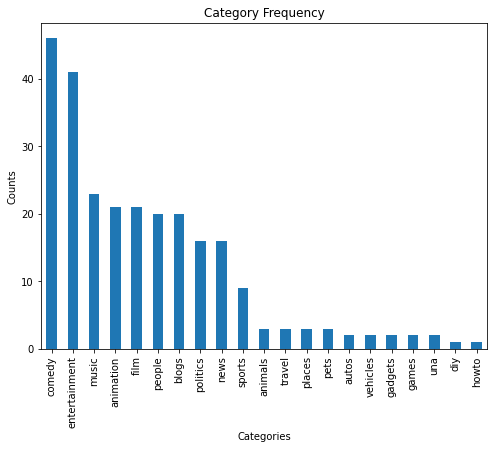

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# Assign column names
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]


# Apply CountVectorizer to the 'category' column
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['category'])

# Convert to DataFrame for easier handling
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Create a plot
plt.figure(figsize=(8, 6))
count_vect_df.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Category Frequency')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

# Load the data
df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# Assign column names
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

category = countvectorizer.fit_transform(df['category'])
uploader = tfidfvectorizer.fit_transform(df['uploader'])

#retrieve the terms found in the corpora
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

df_countvect = pd.DataFrame(data = category.toarray(),index = list(df.index.values) ,columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = uploader.toarray(),index = list(df.index.values) ,columns = tfidf_tokens)

print("Category\n")
print(df_countvect)


Category

     animals  animation  autos  blogs  comedy  diy  entertainment  film  \
0          0          0      0      0       0    0              1     0   
1          0          0      0      0       0    0              0     0   
2          0          0      0      0       1    0              0     0   
3          0          0      0      0       1    0              0     0   
4          0          0      0      0       0    0              0     0   
..       ...        ...    ...    ...     ...  ...            ...   ...   
184        0          0      0      0       0    0              0     0   
185        0          0      0      0       0    0              0     0   
186        0          0      0      0       1    0              0     0   
187        0          0      0      0       1    0              0     0   
188        0          0      0      0       0    0              1     0   

     gadgets  games  ...  music  news  people  pets  places  politics  sports  \
0       

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

# Load the data
df = pd.read_csv("Data/2.txt", sep="\t", header=None)

# Assign column names
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

category = countvectorizer.fit_transform(df['category'])
uploader = tfidfvectorizer.fit_transform(df['uploader'])

#retrieve the terms found in the corpora
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

df_countvect = pd.DataFrame(data = category.toarray(),index = list(df.index.values) ,columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = uploader.toarray(),index = list(df.index.values) ,columns = tfidf_tokens)

print("Uploader\n")
print(df_countvect)

Uploader

     animals  animation  autos  blogs  comedy  diy  entertainment  film  \
0          0          0      0      0       0    0              1     0   
1          0          0      0      0       0    0              0     0   
2          0          0      0      0       1    0              0     0   
3          0          0      0      0       1    0              0     0   
4          0          0      0      0       0    0              0     0   
..       ...        ...    ...    ...     ...  ...            ...   ...   
184        0          0      0      0       0    0              0     0   
185        0          0      0      0       0    0              0     0   
186        0          0      0      0       1    0              0     0   
187        0          0      0      0       1    0              0     0   
188        0          0      0      0       0    0              1     0   

     gadgets  games  ...  music  news  people  pets  places  politics  sports  \
0       

AttributeError: 'TransposedFont' object has no attribute 'getbbox'